# Character Interaction Graph

This tutorial covers a brief example of how to extract a character interaction graph from text. The text used here is Moby Dick by Herman Melville, which is freely available on Project Gutenberg.

Importing required libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
# import pygraphviz

Downloading the Project Gutenberg and Stopwords corpus provided by NLTK

In [4]:
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Sanjana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Checking what books from Project Gutenberg are already available on NLTK

While Project Gutenberg has over 60000+ e-books that are free to access, the gutenberg corpus provided by NLTK has 18 books and plays available in the .txt format

In [5]:
from nltk.corpus import gutenberg
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


Extracting the raw text for Herman Melville's Moby Dick

In [24]:
with open("The DaVinci Code by Brown, Dan (z-lib.org).mobi.txt",  'r', encoding='utf8' ) as f:
    content = f.read()
print(content)


FACT:

The Priory of Sion—a European secret society founded in 1099—is a real organization. In 1975

Paris's Bibliothèque Nationale discovered parchments known as Les Dossiers Secrets, identifying numerous members of the Priory of Sion, including Sir Isaac Newton, Botticelli, Victor Hugo, and Leonardo da Vinci.

The Vatican prelature known as Opus Dei is a deeply devout Catholic sect that has been the topic of recent controversy due to reports of brainwashing, coercion, and a dangerous practice known as

"corporal mortification." Opus Dei has just completed construction of a $47 million World Headquarters at 243 Lexington Avenue in New York City.

All descriptions of artwork, architecture, documents, and secret rituals in this novel are accurate.



Prologue

Louvre Museum, Paris 10:46 P.M.

Renowned curator Jacques Saunière staggered through the vaulted archway of the museum's Grand Gallery. He lunged for the nearest painting he could see, a Caravaggio. Grabbing the gilded frame, the

List out the characters in the book

Here, the list of characters is taken from the [Sparknotes](https://www.sparknotes.com/lit/mobydick/characters/) page. The adjacency matrix is created based on the co-occurrence of these characters in the same sentence.

In [39]:
characters = ['Vittoria Vetra', 'André Vernet', 'Leigh Teabing', 'Silas', 'Jacques Saunière', 'Sophie Neveu', \
            'Rémy Legaludec', 'Robert Langdon', 'Claude Grouard', \
            'Pamela Gettum', 'Jonas Faukman', 'Bezu Fache', 'Simon Edwards', 'Jerome Collet', 'Marie Chauvel', 'Sister Sandrine Bieil', 'Manuel Aringarosa']

In [12]:
print(len(characters))

17


17 characters.

Preprocessing the spaces between the names of characters

In [25]:
'''davinci = ""
for i in characters:
    if '_' in i:
        s = ' '.join(i.split('_'))
        
        content = content.replace(s,i)
'''

sentences = sent_tokenize(content)
(sentences)


['\nFACT:\n\nThe Priory of Sion—a European secret society founded in 1099—is a real organization.',
 "In 1975\n\nParis's Bibliothèque Nationale discovered parchments known as Les Dossiers Secrets, identifying numerous members of the Priory of Sion, including Sir Isaac Newton, Botticelli, Victor Hugo, and Leonardo da Vinci.",
 'The Vatican prelature known as Opus Dei is a deeply devout Catholic sect that has been the topic of recent controversy due to reports of brainwashing, coercion, and a dangerous practice known as\n\n"corporal mortification."',
 'Opus Dei has just completed construction of a $47 million World Headquarters at 243 Lexington Avenue in New York City.',
 'All descriptions of artwork, architecture, documents, and secret rituals in this novel are accurate.',
 'Prologue\n\nLouvre Museum, Paris 10:46 P.M.',
 "Renowned curator Jacques Saunière staggered through the vaulted archway of the museum's Grand Gallery.",
 'He lunged for the nearest painting he could see, a Caravaggi

In [40]:
count = 0
chapters = []
for sent in sentences:
    if ("CHAPTER" in sent and sent[0] == 'C') or "Epilogue" in sent or "CHAPTER 42" in sent:
        sentences.remove(sent)
        count+=1
    elif 'Dan Brown' in sent:
        sentences.remove(sent)
    elif 'Robert-Langdon' in sent:
        sent.replace('Robert-Langdon','Robert Langdon')

print(len(sentences))

12642


Once the text is preprocessed, it is converted into an adjacency matrix, stored as a pandas DataFrame

In [44]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Vittoria Vetra,André Vernet,Leigh Teabing,Silas,Jacques Saunière,Sophie Neveu,Rémy Legaludec,Robert Langdon,Claude Grouard,Pamela Gettum,Jonas Faukman,Bezu Fache,Simon Edwards,Jerome Collet,Marie Chauvel,Sister Sandrine Bieil,Manuel Aringarosa
Vittoria Vetra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
André Vernet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Leigh Teabing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Silas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jacques Saunière,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
for sentence in sentences:
    for char1 in characters:
        s1 = char1.split(' ')
        if len(s1)==1:
            s1+=[s1[0]]
        for char2 in characters:
            s2 = char2.split(' ')
            if len(s2)==1:
                s2+=[s2[0]]
            if (char1 != char2):
                if s1[0] in sentence and s2[0] in sentence:
                    #print('c1: ',sentence)
                    char_df[char1][char2] += 1
                elif s1[0] in sentence and s2[1] in sentence:
                    #print('c2: ',sentence)
                    char_df[char1][char2] += 1
                elif s1[1] in sentence and s2[0] in sentence:
                    #print('c3: ',sentence)
                    char_df[char1][char2] += 1
                elif s1[1] in sentence and s2[1] in sentence:
                    #print('c4: ',sentence)
                    char_df[char1][char2] += 1


#char_df.head()

Creating a NetworkX graph from the adjacency matrix

In [58]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

# for i in range(len(characters)):
#     for j in range(i+1, len(characters)):
#         char1 = characters[i]
#         char2 = characters[j]
#         if G.has_edge(char1, char2):
#             G[char1][char2]['interactions'] = char_df[char1][char2]

Printing nodes and edges in graph

In [59]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 17
Nodes: ['Vittoria Vetra', 'André Vernet', 'Leigh Teabing', 'Silas', 'Jacques Saunière', 'Sophie Neveu', 'Rémy Legaludec', 'Robert Langdon', 'Claude Grouard', 'Pamela Gettum', 'Jonas Faukman', 'Bezu Fache', 'Simon Edwards', 'Jerome Collet', 'Marie Chauvel', 'Sister Sandrine Bieil', 'Manuel Aringarosa']

Number of edges in the graph: 46
Edges: [('Vittoria Vetra', 'Robert Langdon', {'weight': 2}), ('André Vernet', 'Jacques Saunière', {'weight': 4}), ('André Vernet', 'Sophie Neveu', {'weight': 9}), ('André Vernet', 'Robert Langdon', {'weight': 14}), ('André Vernet', 'Bezu Fache', {'weight': 2}), ('André Vernet', 'Jerome Collet', {'weight': 1}), ('Leigh Teabing', 'Silas', {'weight': 5}), ('Leigh Teabing', 'Jacques Saunière', {'weight': 5}), ('Leigh Teabing', 'Sophie Neveu', {'weight': 73}), ('Leigh Teabing', 'Rémy Legaludec', {'weight': 28}), ('Leigh Teabing', 'Robert Langdon', {'weight': 115}), ('Leigh Teabing', 'Bezu Fache', {'weight': 8}), ('Leigh Teabing

Plotting the graph

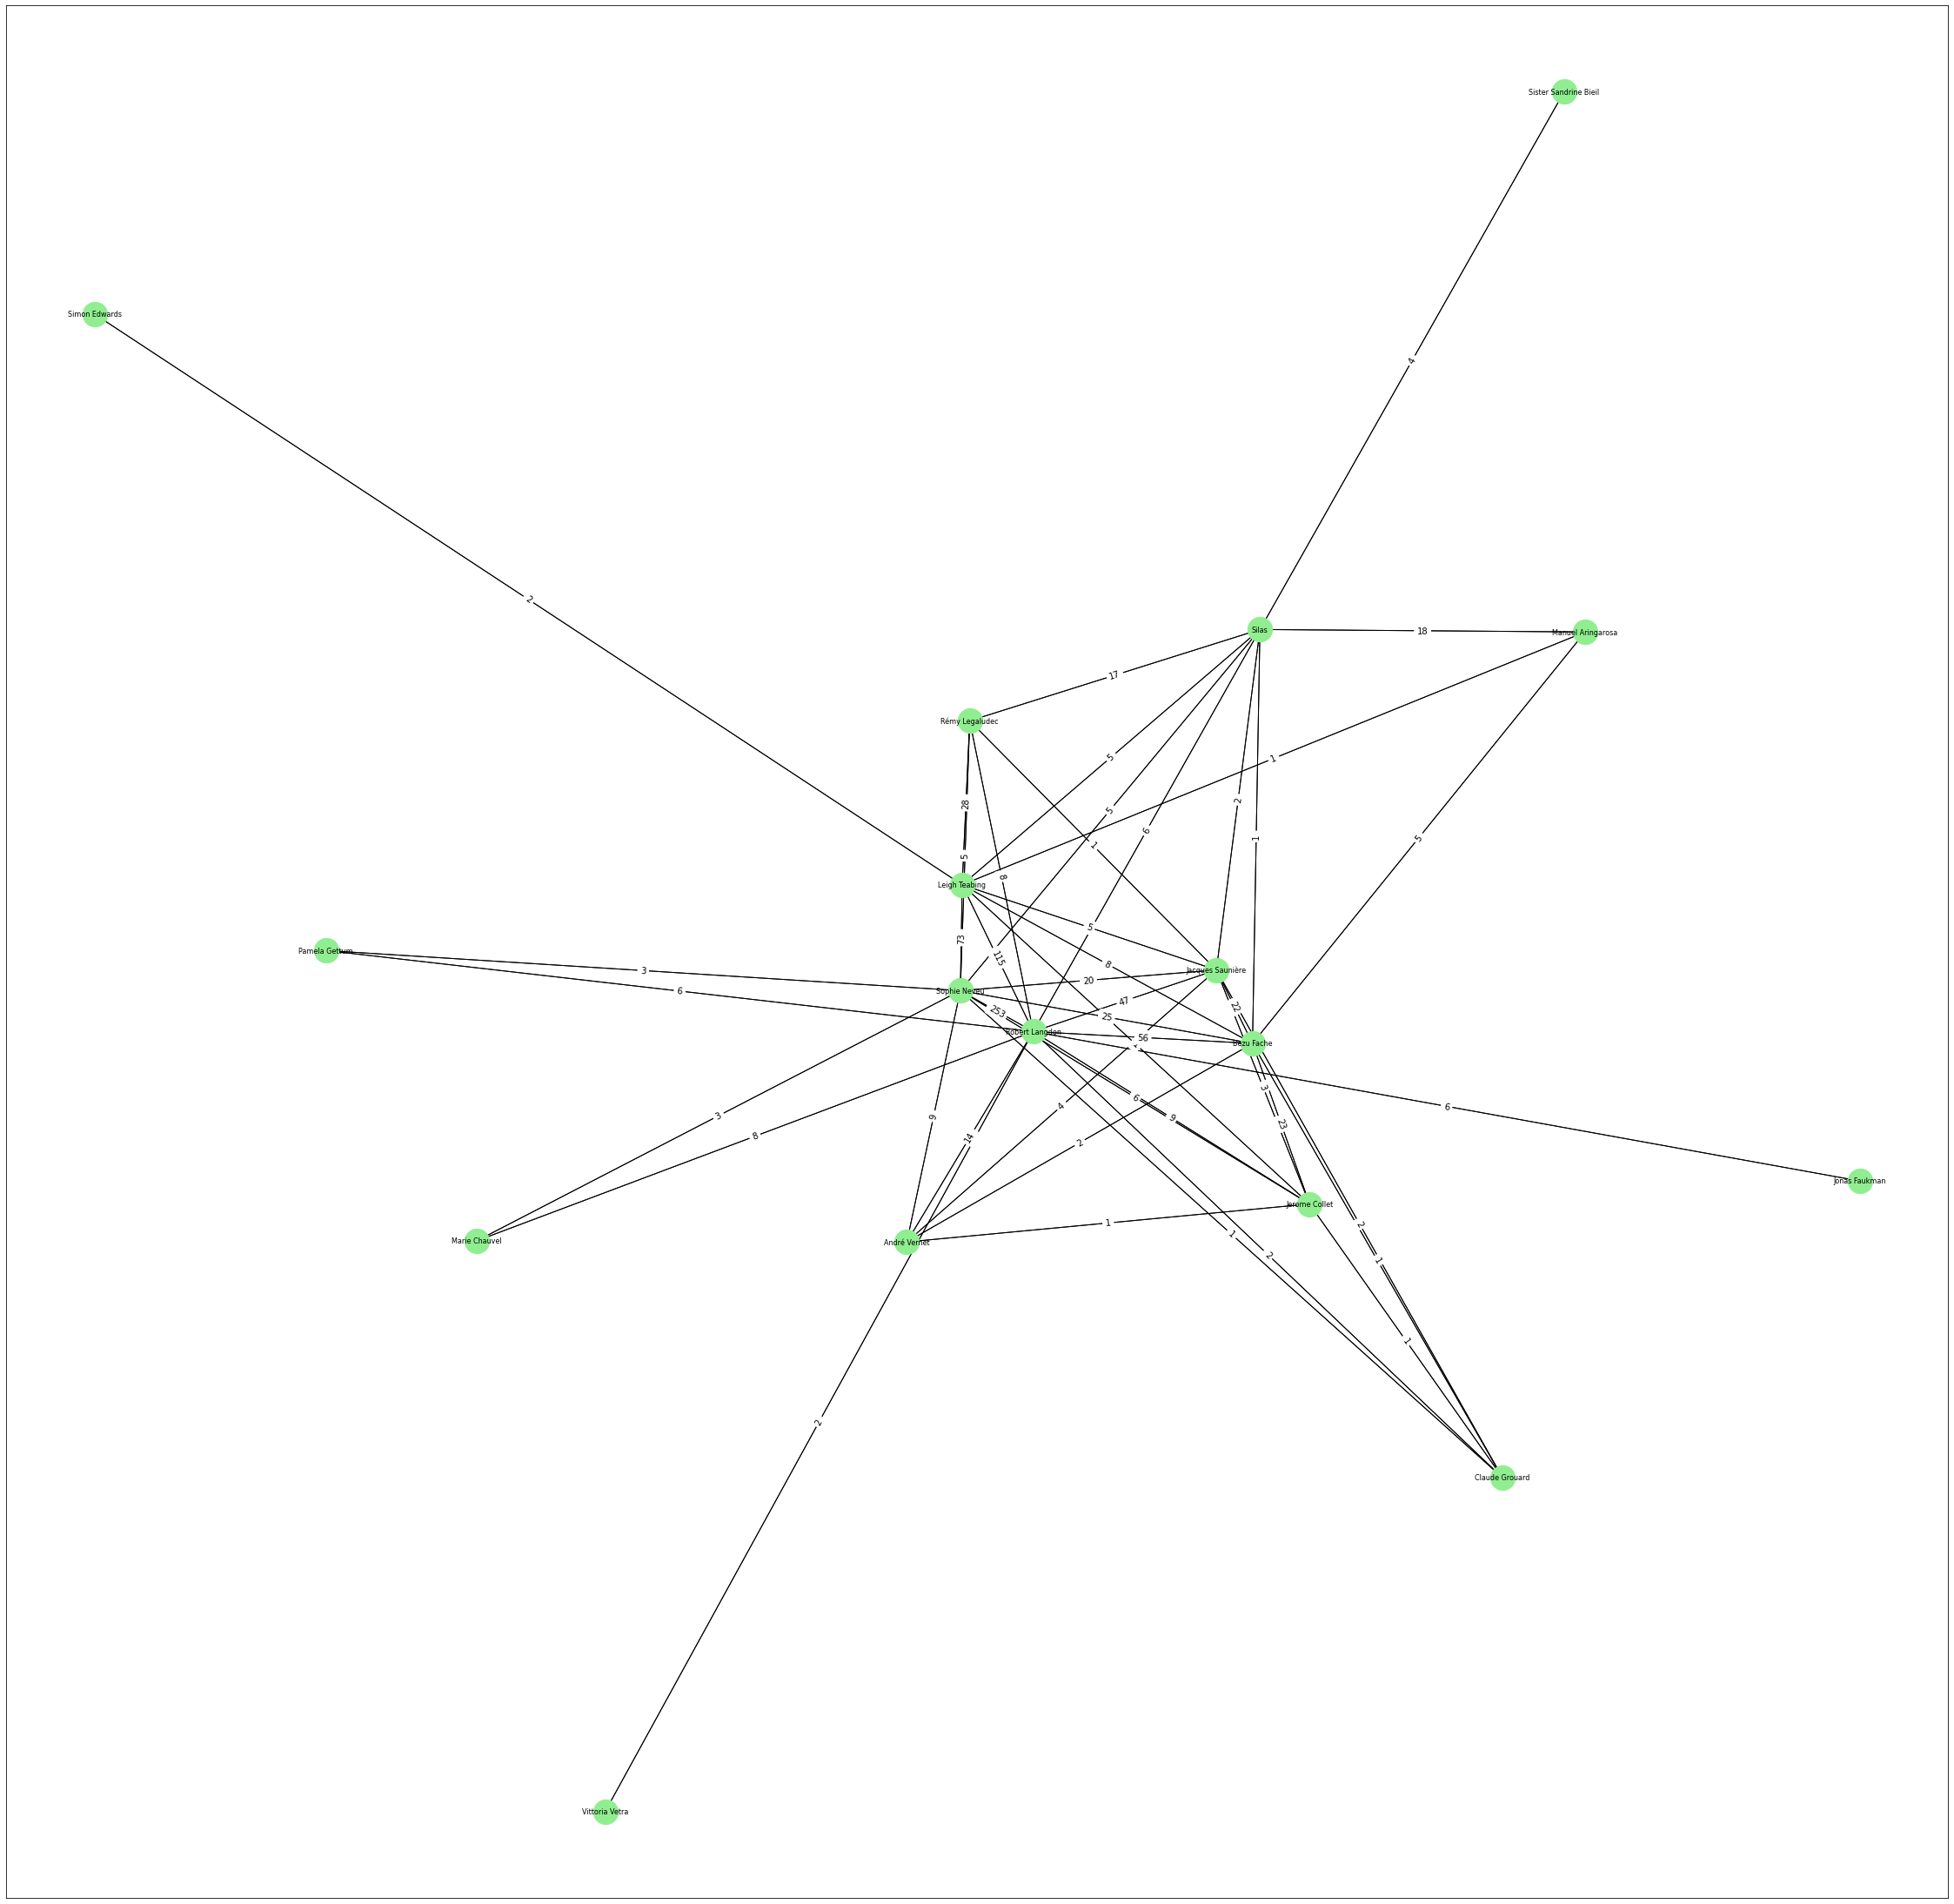

In [60]:
plt.figure(3, figsize=(40,40))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()